<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/relate_anomalies_with_non_time_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries and load data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
calls = pd.read_csv("https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/external_datasets/news/calls_per_day.csv", index_col=0, parse_dates=True)
calls.drop(["snwd"], axis=1, inplace=True)
calls

# decompose time series to trend, season, noise

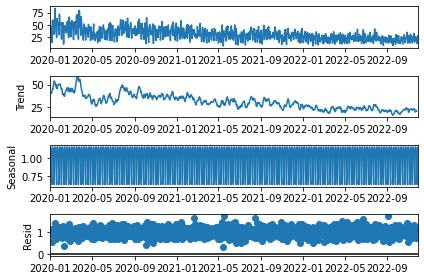

In [25]:
# https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas

decompose_result = seasonal_decompose(calls, model="multiplicative")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

# check for stationarity

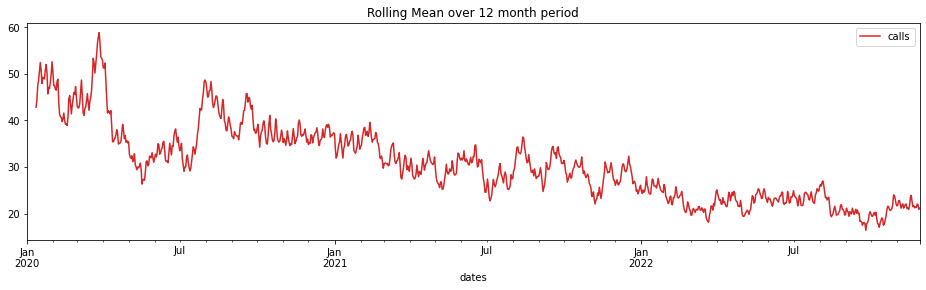

In [20]:
calls.rolling(window = 12).mean().plot(figsize=(16,4), color="tab:red", title="Rolling Mean over 12 month period");

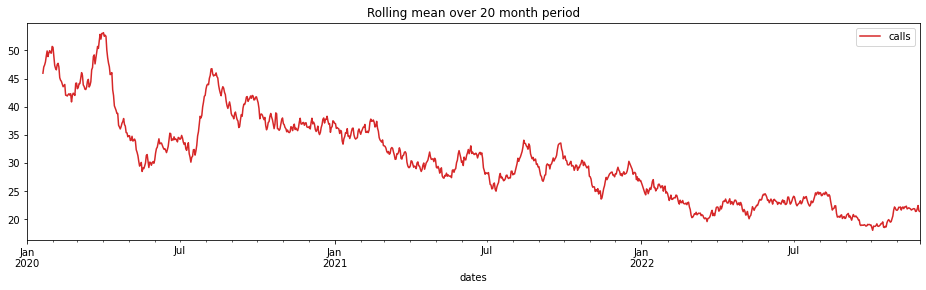

In [21]:
calls.rolling(window = 20).mean().plot(figsize=(16,4), color="tab:red", title="Rolling mean over 20 month period");

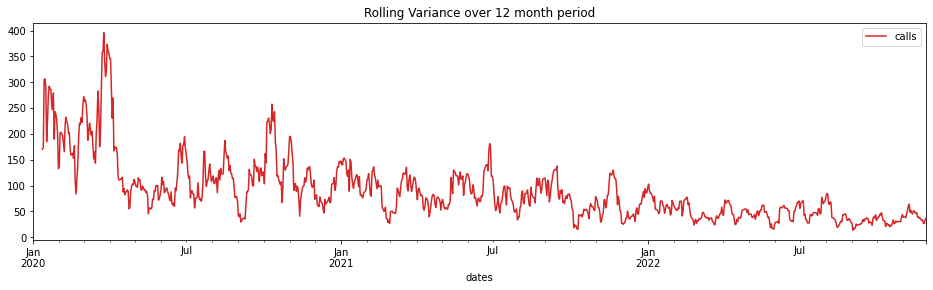

In [19]:
calls.rolling(window = 12).var().plot(figsize=(16,4), color="tab:red", title="Rolling Variance over 12 month period");

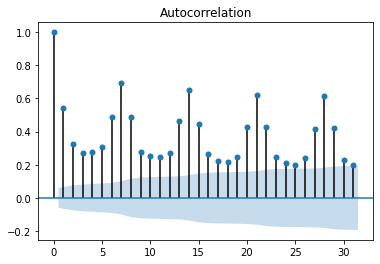

In [26]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(calls);

## p > 0.05 = not stationary = time-dependent components

In [27]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(calls['calls'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.3285754528414633
2. P-Value :  0.1629173532960853
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1042
5. Critical Values :
	 1% :  -3.43664125006105
	 5% :  -2.864317735333004
	 10% :  -2.5682489786730818


# Remove trend component

## log transformation

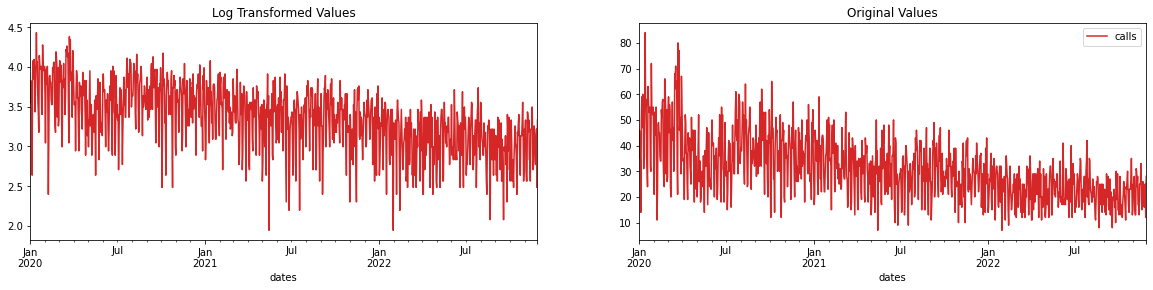

In [30]:
logged_calls = calls["calls"].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
logged_calls.plot(figsize=(20,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
calls.plot(color="tab:red", title="Original Values", ax=ax2);

## power transformation

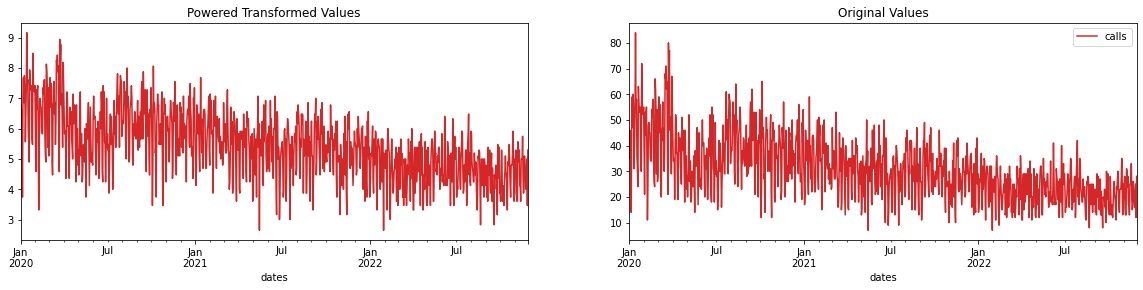

In [34]:
powered_calls = calls["calls"].apply(lambda x : x ** 0.5)

ax1 = plt.subplot(121)
powered_calls.plot(figsize=(20,4), color="tab:red", title="Powered Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
calls.plot(figsize=(20,4), color="tab:red", title="Original Values", ax=ax2);

## moving window --> removes trend

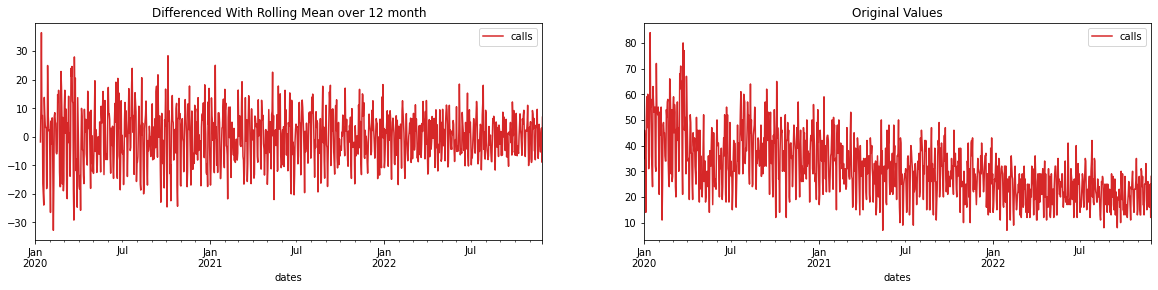

In [36]:
rolling_mean = calls.rolling(window = 12).mean()
calls_rolled_detrended = calls - rolling_mean

ax1 = plt.subplot(121)
calls_rolled_detrended.plot(figsize=(20,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
calls.plot(figsize=(20,4), color="tab:red", title="Original Values", ax=ax2);

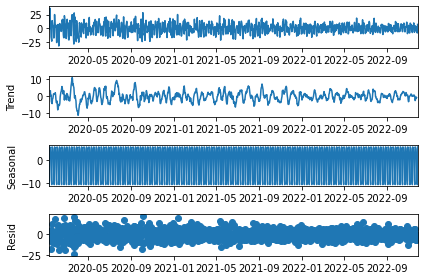

In [37]:
decompose_result = seasonal_decompose(calls_rolled_detrended.dropna())

decompose_result.plot();

## moving window on log transformed calls

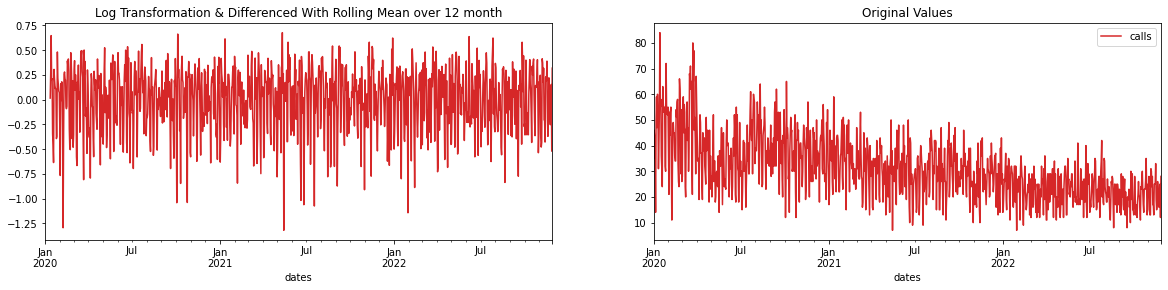

In [39]:
logged_calls = pd.DataFrame(calls["calls"].apply(lambda x : np.log(x)))

rolling_mean = logged_calls.rolling(window = 12).mean()
calls_log_rolled_detrended = logged_calls["calls"] - rolling_mean["calls"]

ax1 = plt.subplot(121)
calls_log_rolled_detrended.plot(figsize=(20,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
calls.plot(figsize=(20,4), color="tab:red", title="Original Values", ax=ax2);

In [ ]:
# ...

# remove seasonality

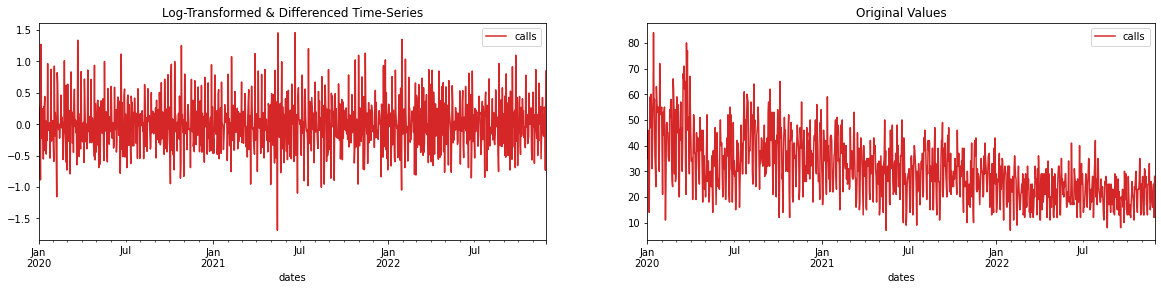

In [43]:
logged_calls_diff = logged_calls - logged_calls.shift()

ax1 = plt.subplot(121)
logged_calls_diff.plot(figsize=(20,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
calls.plot(figsize=(20,4), color="tab:red", title="Original Values", ax=ax2);

In [44]:
dftest = adfuller(logged_calls_diff.dropna()["calls"].values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -12.504760000977667
2. P-Value :  2.756248352795903e-23
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1042
5. Critical Values :
	 1% :  -3.43664125006105
	 5% :  -2.864317735333004
	 10% :  -2.5682489786730818


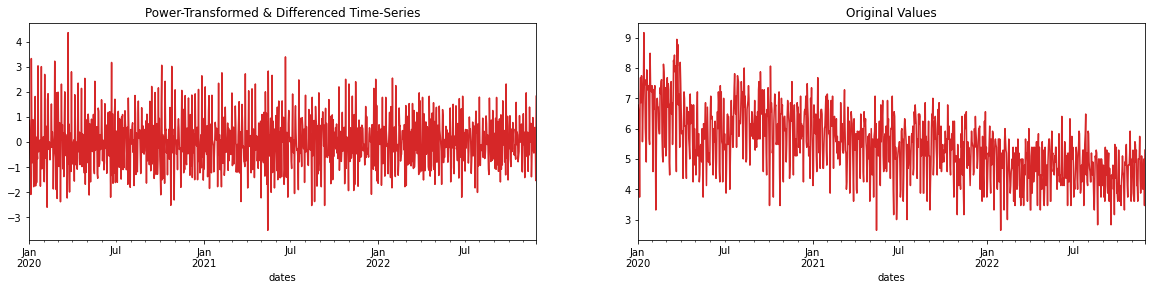

In [46]:
powered_calls_diff = powered_calls - powered_calls.shift()

ax1 = plt.subplot(121)
powered_calls_diff.plot(figsize=(20,4), color="tab:red", title="Power-Transformed & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
powered_calls.plot(figsize=(20,4), color="tab:red", title="Original Values", ax=ax2);

In [50]:
dftest = adfuller(powered_calls_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -12.40463543334924
2. P-Value :  4.4809335401573814e-23
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1042
5. Critical Values :
	 1% :  -3.43664125006105
	 5% :  -2.864317735333004
	 10% :  -2.5682489786730818


# ...

In [65]:
# ! pip install fbprophet
# ! pip install pycaret[full]
! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached lightgbm-3.3.3-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Using cached pandas_profiling-3.

In [58]:
data = calls.copy()
data["dates"] = data.index.to_series()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1063 entries, 2020-01-01 to 2022-11-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   calls   1063 non-null   int64         
 1   dates   1063 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.9 KB


In [62]:
# https://towardsdatascience.com/time-series-anomaly-detection-with-pycaret-706a6e2b2427

# create moving-averages
data['MA48'] = data['calls'].rolling(48).mean()
data['MA336'] = data['calls'].rolling(336).mean()
# plot 
import plotly.express as px

fig = px.line(data, x="dates", y=['calls', 'MA48', 'MA336'], title='title', template = 'plotly_dark')
fig.show()

In [63]:
# drop moving-average columns
data.drop(['MA48', 'MA336'], axis=1, inplace=True)
# set timestamp to index
data.set_index('dates', drop=True, inplace=True)
# resample timeseries to hourly 
data = data.resample('H').sum()
# creature features from date
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
data['hour'] = [i.hour for i in data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]
data.head()

,calls,day,day_name,day_of_year,week_of_year,hour,is_weekday
dates,,,,,,,
2020-01-01 00:00:00,35,1,Wednesday,1,1,0,3
2020-01-01 01:00:00,0,1,Wednesday,1,1,1,3
2020-01-01 02:00:00,0,1,Wednesday,1,1,2,3
2020-01-01 03:00:00,0,1,Wednesday,1,1,3,3
2020-01-01 04:00:00,0,1,Wednesday,1,1,4,3


In [66]:
# init setup

from pycaret.anomaly import *

s = setup(data, session_id = 123)

ImportError: ignored